# Illustration of the JL Lemma

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

 We generate three three-dimensional clusters, which we will project into a two-dimensional space. More concretely, we do the following:
 
- Generate 100 data points according htto $\mathcal{N} \Biggr( \begin{bmatrix} 5 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} \frac{1}{10} & 0 & 0\\ 0 &\frac{1}{10} & 0 \\ 0 & 0 & \frac{1}{10} \end{bmatrix} \Biggr)$, a blue cluster.
    
- Generate 100 data points according to $\mathcal{N} \Biggr( \begin{bmatrix} 0 \\ 5 \\ 0 \end{bmatrix}, \begin{bmatrix} \frac{1}{2} & 0 & 0\\ 0 &\frac{1}{2} & 0 \\ 0 & 0 & \frac{1}{2} \end{bmatrix} \Biggr)$, an orange cluster.
    
- Generate 100 data points according to $\mathcal{N} \Biggr( \begin{bmatrix} 0 \\ 0 \\ 15 \end{bmatrix}, \begin{bmatrix} 1 & 0 & 0\\ 0 &1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \Biggr)$, a green cluster.
    
- Generate $\Phi \in \mathbb{R}^{2 \times 3}$, with entries distributed according to $\mathcal{N}(0, \frac{1}{k})$, i.e. according to $\mathcal{N}(0, \frac{1}{2}$).
    
- Perform a linear dimensionality reduction using $\Phi$ on all the generated points.
    



In [2]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))
A, v

(array([[[-0.0085842 , -0.35819923,  0.70948726, -1.66892371],
         [ 0.07345942,  0.57826245,  1.57499652,  0.24948273]],
 
        [[-0.72502103, -0.62341194,  0.5520722 , -1.19642482],
         [-0.5342551 , -0.12320546,  1.48020862,  0.46559208]],
 
        [[ 0.38011727,  1.1123706 ,  0.80809877,  1.54941724],
         [-0.63547299,  0.63009858,  0.54288976, -0.66516391]]]),
 array([ 0.44679283,  0.62596778, -1.3497849 ]))

#### Let n=3, let us simulate 3 clusters of 10 point each distributed according to some Gaussians

In [3]:
mean_1 = [5, 0, 0]
cov_1 = [[1/10, 0, 0], [0, 1/10, 0], [0, 0, 1/10]] 

mean_2 = [0, 5, 0]
cov_2 = [[1/2, 0, 0], [0, 1/2, 0], [0, 0, 1/2]] 

mean_3 = [0, 0, 15]
cov_3 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] 

In [4]:
cluster_3d_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
x_3d_1 = cluster_3d_1[:,0]
y_3d_1 = cluster_3d_1[:,1]
z_3d_1 = cluster_3d_1[:,2]

In [5]:
cluster_3d_2 = np.random.multivariate_normal(mean_2, cov_2, 100)
x_3d_2 = cluster_3d_2[:,0]
y_3d_2 = cluster_3d_2[:,1]
z_3d_2 = cluster_3d_2[:,2]

In [6]:
cluster_3d_3 = np.random.multivariate_normal(mean_3, cov_3, 100)
x_3d_3 = cluster_3d_3[:,0]
y_3d_3 = cluster_3d_3[:,1]
z_3d_3 = cluster_3d_3[:,2]

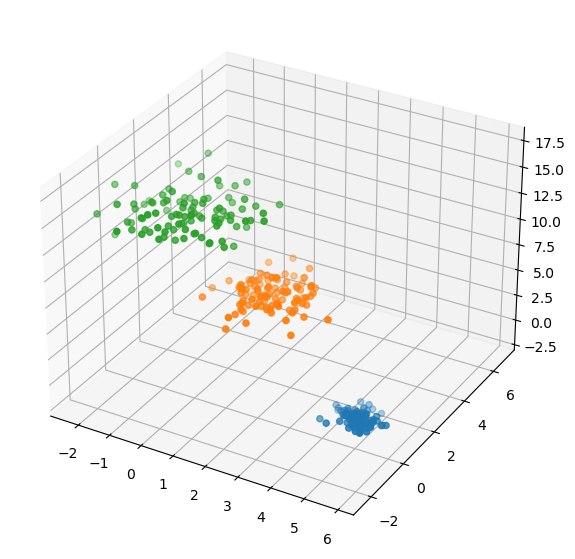

In [7]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = x_3d_1, ys = y_3d_1, zs = z_3d_1) # plot the point (2,3,4) on the figure
ax.scatter(xs = x_3d_2, ys = y_3d_2, zs = z_3d_2)
ax.scatter(xs = x_3d_3, ys = y_3d_3, zs = z_3d_3)

plt.show()

### Choose $\epsilon = 0.1, k=2$

In [8]:
k = 2

In [9]:
A_transform = 1 / (math.sqrt(k)) * np.random.normal(0, 1, size=(2, 3))

In [10]:
A_transform

array([[-0.86271888,  0.3626726 , -0.17343136],
       [-1.57033297, -0.99897329,  1.0191219 ]])

In [11]:
cluster_2d_1 = (A_transform @ cluster_3d_1.T)
cluster_2d_2 = (A_transform @ cluster_3d_2.T)
cluster_2d_3 = (A_transform @ cluster_3d_3.T)

In [12]:
(A_transform @ cluster_3d_1.T)[0,:]

array([-4.27583825, -4.79368217, -4.15040028, -4.301942  , -4.74881542,
       -4.19338108, -4.04356566, -4.86860742, -4.15760813, -4.45567945,
       -4.52058987, -3.66906777, -4.51792528, -4.16945263, -4.33422255,
       -4.2978699 , -4.59595543, -4.32182295, -4.21281779, -4.31549145,
       -4.35445996, -4.58108192, -4.35920275, -4.7226648 , -4.76001489,
       -4.33007178, -4.38847238, -4.22701312, -4.19640705, -4.37527264,
       -3.97528991, -3.64313711, -4.0751394 , -4.48413848, -4.99261462,
       -3.89502861, -4.32341509, -4.63429665, -4.41035198, -4.99681213,
       -4.20226744, -4.27919742, -4.56011745, -4.12457567, -4.18086631,
       -4.30543657, -4.40423722, -3.52499537, -4.34664686, -4.51031452,
       -4.66738863, -4.14605817, -4.14729645, -4.54583151, -4.32976142,
       -4.21629474, -3.94616841, -4.65812741, -4.62590097, -4.28983707,
       -4.55829424, -4.43687662, -4.4671032 , -4.42579544, -4.46113525,
       -4.24927744, -3.89456556, -4.3126517 , -4.39340724, -4.50

In [13]:
x_2d_1 = cluster_2d_1[0,:]
y_2d_1 = cluster_2d_1[1,:]
x_2d_2 = cluster_2d_2[0,:]
y_2d_2 = cluster_2d_2[1,:]
x_2d_3 = cluster_2d_3[0,:]
y_2d_3 = cluster_2d_3[1,:]

x_2d_1

array([-4.27583825, -4.79368217, -4.15040028, -4.301942  , -4.74881542,
       -4.19338108, -4.04356566, -4.86860742, -4.15760813, -4.45567945,
       -4.52058987, -3.66906777, -4.51792528, -4.16945263, -4.33422255,
       -4.2978699 , -4.59595543, -4.32182295, -4.21281779, -4.31549145,
       -4.35445996, -4.58108192, -4.35920275, -4.7226648 , -4.76001489,
       -4.33007178, -4.38847238, -4.22701312, -4.19640705, -4.37527264,
       -3.97528991, -3.64313711, -4.0751394 , -4.48413848, -4.99261462,
       -3.89502861, -4.32341509, -4.63429665, -4.41035198, -4.99681213,
       -4.20226744, -4.27919742, -4.56011745, -4.12457567, -4.18086631,
       -4.30543657, -4.40423722, -3.52499537, -4.34664686, -4.51031452,
       -4.66738863, -4.14605817, -4.14729645, -4.54583151, -4.32976142,
       -4.21629474, -3.94616841, -4.65812741, -4.62590097, -4.28983707,
       -4.55829424, -4.43687662, -4.4671032 , -4.42579544, -4.46113525,
       -4.24927744, -3.89456556, -4.3126517 , -4.39340724, -4.50

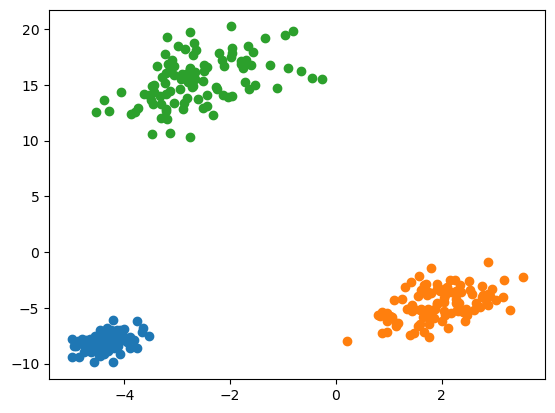

In [14]:
plt.scatter(x_2d_1, y_2d_1)
plt.scatter(x_2d_2, y_2d_2)
plt.scatter(x_2d_3, y_2d_3)

plt.show()